# MNIST Tutorial with Chainer ver.1.21.0

人工知能､Deep Learning実装の基礎として､手書き文字認識を行う｡
データセットMNISTに収録されている手書き数字のデータ計6万枚を学習し､与えられた画像にどの数字がかかれているかを推測します｡  

今日扱うのは､人工知能プログラミングの基礎です｡
この手法を応用･拡張していくことで､実際に役に立つ人工知能を作ることが出来ます｡

In [9]:
# 必要なモジュールのインポート

import chainer                          # 機械学習のコードをシンプルにしてくれるライブラリ
import chainer.functions as F           # chainerに組み込まれた､関数をまとめてあるクラス
import chainer.links as L               # chainerに組み込まれた､ニューラルネットの繋がり方を定義するクラス
from chainer import training            # chianerに組み込まれた､学習部分のコードをシンプルにしてくれるクラス
from chainer.training import extensions # chainerのtrainerに組み込まれた､trainerの機能を拡張してくれるクラス
import numpy as np                      # 行列計算を簡単にしてくれるライブラリ
import matplotlib.pyplot as plt         # 画像やグラフを表示してくれるライブラリ
% matplotlib inline                     # matplotlibをjupyter上で扱えるようにするコマンド

UsageError: unrecognized arguments: # matplotlibをjupyter上で扱えるようにするコマンド


## MNISTとは？

### MNISTとは､手書き数字画像のデータセットです。
![](https://www.tensorflow.org/versions/master/images/MNIST.png)
このような0〜9の手書き数字の画像（28px × 28px）が計7万枚収録されています。

In [10]:
# MNISTのデータセットを読み込む
train, test = chainer.datasets.get_mnist()

In [11]:
# trainのサイズを確認
len(train)

60000

In [12]:
# testのサイズを確認
len(test)

10000

In [13]:
# 画像を表示する関数
# 特に人工知能とは関係ないので､読み飛ばしてもらって大丈夫です｡

def draw_digit(data):
    """数値の行列データを画像表示"""
    size = 28
    plt.figure(figsize=(3, 3))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

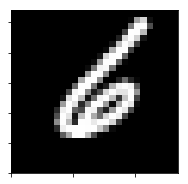

In [14]:
# データセットの画像を見てみましょう｡
# 一つ目の[]の中の数字を変えて､いろんな数字の画像が含まれているのを確認しましょう
sample_data = np.array(train[999][0])
draw_digit(sample_data)

## MNISTデータセットの構造
MNISTのデータセットは､,このように手書き数字の画像と､答えとなる数字データがセットで並んでいます｡  
1つ目の [] が横の番号を､2つ目の [] が縦の番号を表しています｡
![](https://www.fastpic.jp/images.php?file=3409487222.png)

In [16]:
# 手書き文字画像を行列の形式で表示
# 画像は､行列で表現できる
print(sample_data)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02352941
  0.63137257  0.83529419  0.0627451   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0

## もっと見やすくすると､こんな感じです｡
各位置の黒さと､数字の大きさが対応していることがわかります｡
![](https://www.tensorflow.org/versions/master/images/MNIST-Matrix.png)

参考URL：http://tensorflow.classcat.com/2016/03/09/tensorflow-cc-mnist-for-ml-beginners/

In [19]:
# ニューラルネットのモデルを定義
# 層が5つ以上になってくると､Deep Learningと呼ばれるようになります｡

class MLP(chainer.Chain):

    def __init__(self):
        """ ネットワークの構造を定義 """
        super(MLP, self).__init__(
            l1=L.Linear(784, 900),   # 入力784ユニット、 出力900ユニット
            l2=L.Linear(900, 1200),  # 入力900ユニット、 出力1200ユニッ
            l3=L.Linear(1200, 800),  # 入力1200ユニット、出力800ユニット
            l4=L.Linear(800, 500),   # 入力800ユニット､  出力500ユニット
            l5=L.Linear(500, 10),    # 入力500ユニット､  出力10ユニット
        )

    def __call__(self, x):
        """ 計算の規則を定義 """
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        h4 = F.relu(self.l4(h3))
        return self.l5(h4)

## 定義されたモデルを図にすると以下のようになります。

人間の脳のニューロンの繋がりを模しているので､ニューラルネットワークと呼ばれます｡
各パーセプトロンで計算した数値が､次々に右側の層へ受け渡されていきます｡

これは､人間の脳で行われている､電気信号の受け渡しを表現しています｡

手書き数字のデータ（28px × 28px）を変換すると､784次元のベクトルになります｡
インプットの数値の個数は784ユニットになります。

中間の層の数は､大体で決めています｡それなりに大きな数であれば､ある程度なんでも大丈夫です｡

最後の層では、0〜9の数字である確率を出力するため10個のユニットになります。
![](https://qiita-image-store.s3.amazonaws.com/0/50670/155b9533-4b47-0748-226c-1e3082930ed9.png)

参考URL：http://qiita.com/kenmatsu4/items/7b8d24d4c5144a686412

## 活性化関数

ニューロンが電気信号を受けて発火する様子を､活性化関数と言うものを利用して表現します｡

F.relu()はREctified Linear Unit functionの略で､折略曲げられた直線型の関数になっています｡

$$
{f(x) = \max(0, x)
}
$$
![](https://qiita-image-store.s3.amazonaws.com/0/50670/e1cc4c94-e4ae-0010-82e5-c27956b5986c.png)

このような数式です。

In [20]:
# ミニバッチのサイズを指定
batchsize = 100

# 学習の繰り返し回数（epoch）を指定
epoch = 20

In [21]:
# 訓練のためのニューラルネットワークをセットアップする
model = L.Classifier(MLP())

# 最適化の方法を定義
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)

In [22]:
# データセットをイテレータの形式に変換する
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [23]:
# trainerにセットする
updater = training.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (epoch, 'epoch'))

# epochごとに学習後の精度を評価する
trainer.extend(extensions.Evaluator(test_iter, model))

# epochごとにlogを出力する
trainer.extend(extensions.LogReport())

# logに出力する情報を指定する
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss',
                                       'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))

# 進捗バーを表示する
trainer.extend(extensions.ProgressBar())

# 構成したtrainerをもとに､学習を実行する
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
     total [..................................................]  0.83%
this epoch [########..........................................] 16.67%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [..................................................]  1.67%
this epoch [################..................................] 33.33%
       200 iter, 0 epoch / 20 epochs
    36.687 iters/sec. Estimated time to finish: 0:05:21.641225.
     total [#.................................................]  2.50%
this epoch [#########################.........................] 50.00%
       300 iter, 0 epoch / 20 epochs
    36.323 iters/sec. Estimated time to finish: 0:05:22.112007.
     total [#.................................................]  3.33%
this epoch [#################################.................] 66.67%
       400 iter, 0 epoch / 20 epochs

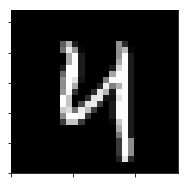

In [28]:
# 学習済みモデルを使用して予測

# 予測したいデータのindexを入力
# testから出力するので､ 0 <= index <= 9999 の範囲から選択

index = 789

# 予測したい画像を表示
pred = np.array(test[index][0]).reshape(-1, 1, 28, 28)
draw_digit(pred)

In [29]:
# ニューラルネットで書いてある数字を予測
# このあたりはあまり重要ではないので､コピペで大丈夫です｡
mnist_test = model.predictor(pred)
pre_num = int(np.argmax(mnist_test.data, axis=1))

# 予測結果を出力
print("予測:" + str(pre_num))

# 正解したのか､間違えたのかを出力
if pre_num == test[index][1]:
    print('正解しました！')
else:
    print('間違えました...')

予測:4
正解しました！
